# **Deepfake detection model**

## **mounting drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! mkdir -p ~/.kaggle

In [ ]:
! cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d xhlulu/140k-real-and-fake-faces

100% 3.74G/3.75G [00:37<00:00, 140MB/s]
100% 3.75G/3.75G [00:37<00:00, 108MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/140k-real-and-fake-faces.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

## **Imports**

In [ ]:
from keras.applications import InceptionV3
from keras.models import Model
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import regularizers
from keras.layers import Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy
# from tensorflow.keras.metrics import accuracy

import tensorflow as tf
from tensorflow import keras
from keras.models import Model
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.applications.vgg16 import preprocess_input
from keras.applications import ResNet50
from keras.applications import InceptionV3
from keras.applications import InceptionResNetV2
from keras.applications import DenseNet201
from keras.optimizers import Adam
from keras.regularizers import l1, l2
from keras.callbacks import EarlyStopping
from keras import Sequential
from keras.preprocessing.image import ImageDataGenerator


## **Data Augmentation**

In [ ]:



# input_shape = (256,256, 3)
# num_classes = 2
learning_rate = 0.0001
batch_size = 128


train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,  # Reduce rotation range
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    brightness_range=[0.8, 1.2],
    channel_shift_range=0.1,
    fill_mode='nearest'  # Add fill mode to handle newly created pixels
)


test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/real_vs_fake/real-vs-fake/train',
    target_size=(224,224),
    batch_size=batch_size,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    '/content/real_vs_fake/real-vs-fake/valid',
    target_size=(224,224),
    batch_size=batch_size,
    class_mode='binary'
)


Found 100000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


In [ ]:
conv_base= InceptionV3(
    weights='imagenet',
    input_shape=(299,299,3)
)
classifier=Sequential()
classifier.add(conv_base)
classifier.add(Flatten())
classifier.add(Dense(512, activation='relu',kernel_regularizer=l2(0.0001)))
classifier.add(BatchNormalization())
classifier.add(Dropout(0.2))

classifier.add(Dense(1, activation='sigmoid'))
conv_base.trainable=True
optimizer = Adam(learning_rate=0.0001)

classifier.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model_history=classifier.fit(train_generator,epochs=10,validation_data=validation_generator)

Epoch 1/10
394/782 [==============>...............] - ETA: 14:25 - loss: 0.0587 - accuracy: 0.9861

## **Testing**

In [ ]:
test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/PBL18/test',
    target_size=(256, 256),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False  # Important: Do not shuffle for correct label matching
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Generate predictions for the test data
predictions = model.predict(test_generator)
predicted_classes = [1 if prediction > 0.5 else 0 for prediction in predictions]


Found 300 images belonging to 2 classes.
10/10 [==============================] - 41s 5s/step - loss: 0.7433 - accuracy: 0.7367
Test Loss: 0.7433399558067322
Test Accuracy: 0.7366666793823242
10/10 [==============================] - 3s 148ms/step


### **plotting graphs**

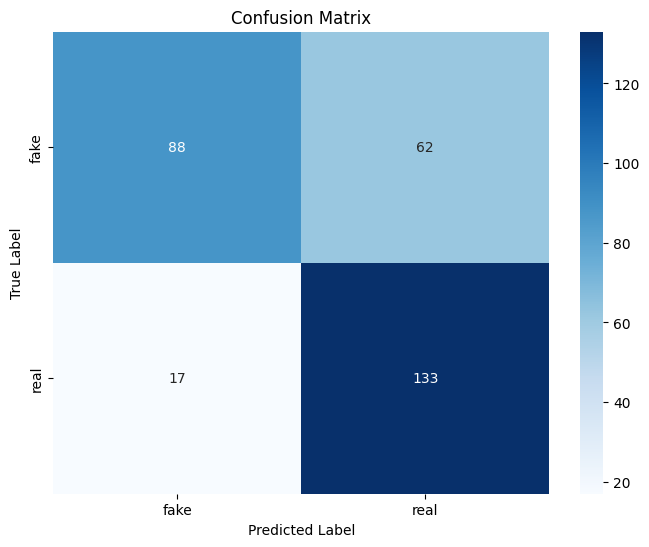

In [ ]:

true_labels = test_generator.classes




cm = confusion_matrix(true_labels, predicted_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

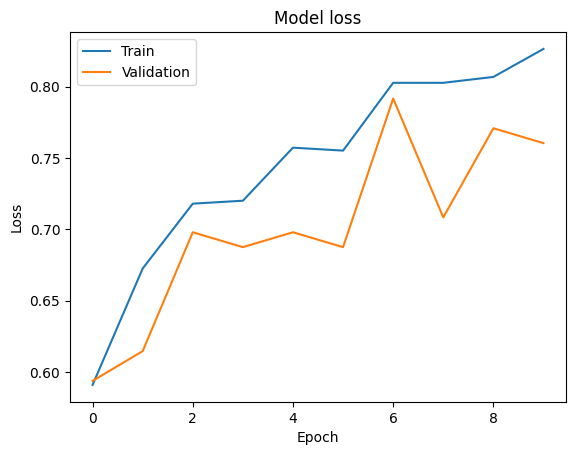

In [ ]:


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()





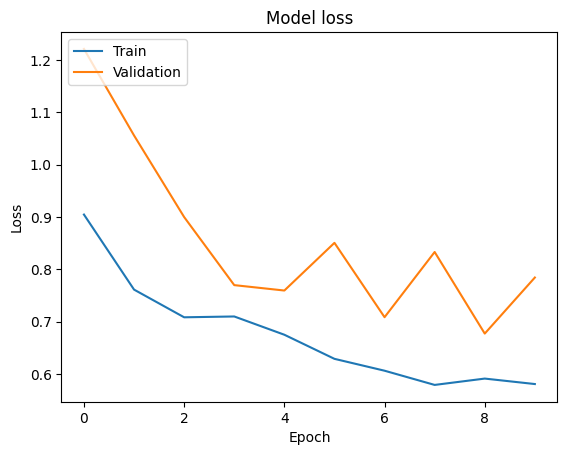

In [ ]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()